### Importação de biblitecas

In [339]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline
np.seterr(divide='ignore', invalid='ignore');

### Aquisição das bases de dados

In [340]:
dfem = pd.read_csv('estaticos_market.csv', index_col = 0)
dfp1 = pd.read_csv('estaticos_portfolio1.csv', index_col = 0)
dfp2 = pd.read_csv('estaticos_portfolio2.csv', index_col = 0)
dfp3 = pd.read_csv('estaticos_portfolio3.csv', index_col = 0)

In [341]:
aux = pd.DataFrame({'colunas': dfem.columns, 'tipos': dfem.dtypes, 'missing': dfem.isna().sum()})
aux['missing_percentual'] = 100*(aux['missing'] / dfem.shape[0])
aux.query('missing_percentual > 50')

,colunas,tipos,missing,missing_percentual
vl_total_tancagem,vl_total_tancagem,float64,462018,99.939433
vl_total_veiculos_antt,vl_total_veiculos_antt,float64,462122,99.961929
vl_total_veiculos_leves,vl_total_veiculos_leves,float64,431614,93.362723
vl_total_veiculos_pesados,vl_total_veiculos_pesados,float64,431614,93.362723
qt_art,qt_art,float64,455708,98.574513
...,...,...,...,...
qt_funcionarios_12meses,qt_funcionarios_12meses,float64,358724,77.595836
qt_funcionarios_24meses,qt_funcionarios_24meses,float64,358724,77.595836
tx_crescimento_12meses,tx_crescimento_12meses,float64,388410,84.017236
tx_crescimento_24meses,tx_crescimento_24meses,float64,388284,83.989980


### Variáveis que não agregam valor à base de dados dfem

In [342]:
colunas_para_tirar = ['qt_funcionarios_24meses', 'tx_crescimento_12meses', 'tx_crescimento_24meses', 'tx_rotatividade', 'max_meses_servicos', 
'min_meses_servicos', 'qt_funcionarios', 'qt_funcionarios_12meses', 'media_meses_servicos_all', 'max_meses_servicos_all', 'min_meses_servicos_all', 
'media_meses_servicos', 'qt_admitidos_12meses', 'meses_ultima_contratacaco', 'qt_desligados_12meses', 'qt_desligados', 'qt_admitidos', 'natureza_juridica_macro',
'grau_instrucao_macro_escolaridade_media', 'grau_instrucao_macro_escolaridade_superior', 'grau_instrucao_macro_desconhecido', 'total', 'idade_de_54_a_58', 'fl_email',
'idade_acima_de_58', 'grau_instrucao_macro_analfabeto', 'grau_instrucao_macro_escolaridade_fundamental', 'idade_de_34_a_38', 'idade_de_39_a_43', 'nm_divisao',
'idade_de_44_a_48', 'idade_de_49_a_53', 'idade_ate_18', 'idade_de_19_a_23', 'idade_de_24_a_28','idade_de_29_a_33', 'vl_total_tancagem', 'vl_total_veiculos_antt',
'vl_total_veiculos_leves', 'vl_total_veiculos_pesados', 'qt_art', 'vl_total_tancagem_grupo', 'vl_total_veiculos_antt_grupo', 'vl_potenc_cons_oleo_gas', 
'de_indicador_telefone','qt_coligados_atividade_mt_baixo', 'qt_coligados_atividade_inativo', 'vl_frota','qt_socios_pep', 'sg_uf_matriz', 'fl_telefone',
'qt_alteracao_socio_total', 'qt_alteracao_socio_90d', 'qt_alteracao_socio_180d', 'qt_socios_pj_inaptos', 'vl_idade_media_socios_pj', 'vl_idade_maxima_socios_pj',
'qt_alteracao_socio_365d', 'qt_socios_pj_ativos', 'qt_socios_pj_nulos', 'qt_socios_pj_baixados', 'qt_socios_pj_suspensos', 'qt_coligados', 'qt_socios_coligados',
'qt_coligados_matriz', 'qt_coligados_ativo', 'qt_coligados_baixada', 'qt_coligados_inapta', 'qt_coligados_suspensa', 'qt_coligados_nula', 'idade_media_coligadas', 
'idade_maxima_coligadas', 'qt_socios_st_suspensa', 'qt_socios_masculino', 'qt_socios_feminino', 'vl_idade_minima_socios_pj', 'idade_minima_coligadas', 
'coligada_mais_nova_ativa', 'coligada_mais_antiga_ativa', 'idade_media_coligadas_ativas', 'coligada_mais_nova_baixada', 'coligada_mais_antiga_baixada', 
'idade_media_coligadas_baixadas', 'qt_coligados_sa', 'qt_coligados_me', 'qt_coligados_mei', 'qt_coligados_ltda', 'qt_coligados_epp', 'qt_coligados_norte', 
'qt_coligados_sul', 'qt_coligados_nordeste', 'qt_coligados_centro', 'qt_coligados_sudeste', 'qt_coligados_exterior', 'qt_ufs_coligados', 'qt_regioes_coligados', 
'qt_ramos_coligados', 'qt_ramos_coligados', 'qt_coligados_industria', 'qt_coligados_agropecuaria', 'qt_coligados_comercio', 'qt_coligados_serviço', 'idade_emp_cat',
'qt_coligados_ccivil', 'qt_funcionarios_coligados', 'qt_funcionarios_coligados_gp', 'media_funcionarios_coligados_gp', 'max_funcionarios_coligados_gp', 
'min_funcionarios_coligados_gp', 'vl_folha_coligados', 'media_vl_folha_coligados', 'max_vl_folha_coligados', 'min_vl_folha_coligados', 'vl_folha_coligados_gp', 
'media_vl_folha_coligados_gp', 'max_vl_folha_coligados_gp', 'min_vl_folha_coligados_gp', 'faturamento_est_coligados', 'media_faturamento_est_coligados', 
'max_faturamento_est_coligados', 'min_faturamento_est_coligados', 'faturamento_est_coligados_gp', 'media_faturamento_est_coligados_gp', 'idade_maxima_socios',
'max_faturamento_est_coligados_gp', 'min_faturamento_est_coligados_gp', 'total_filiais_coligados', 'media_filiais_coligados', 'max_filiais_coligados', 
'min_filiais_coligados', 'qt_coligados_atividade_alto', 'qt_coligadas', 'sum_faturamento_estimado_coligadas', 'qt_ex_funcionarios', 'qt_funcionarios_grupo', 
'percent_func_genero_masc', 'percent_func_genero_fem', 'qt_coligados_atividade_medio', 'qt_coligados_atividade_baixo', 'dt_situacao', 'nm_segmento', 'idade_emp_cat',
'nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao', 'nm_meso_regiao', 'nm_micro_regiao', 'qt_socios', 'qt_socios_pf', 'qt_socios_pj', 'idade_media_socios',
'idade_minima_socios', 'qt_socios_st_regular', 'natureza_juridica_macro', 'setor', 'de_natureza_juridica']

# Variáveis muito específicas: Ex.: microrregões
# Muitos dados faltantes
# Variáveis redundantes

In [343]:
dfem.drop(colunas_para_tirar, axis = 1, inplace = True)

### Tratamento das variáveis restantes com valores faltantes

In [344]:
values_dfem = {'nm_divisao': 'S/ informação', 'sg_uf_matriz': 'S/ informação', 'de_saude_rescencia': 'S/ informação', 
         'de_nivel_atividade': 'S/ informação', 'de_saude_tributaria': 'S/ informação',
         'de_faixa_faturamento_estimado': 'S/ informação', 'de_faixa_faturamento_estimado_grupo': 'S/ informação',
         'fl_spa': False, 'fl_antt': False, 'fl_veiculo': False, 'fl_simples_irregular': False, 'fl_passivel_iss': False, 'fl_optante_simples': False,
         'fl_optante_simei': False, 'vl_total_veiculos_leves_grupo': round(dfem['vl_total_veiculos_leves_grupo'].mean(), 0),
         'vl_total_veiculos_pesados_grupo': round(dfem['vl_total_veiculos_pesados_grupo'].mean(), 0),
         'vl_faturamento_estimado_aux': float(round(dfem['vl_faturamento_estimado_aux'].mode(), 0)),
         'vl_faturamento_estimado_grupo_aux': float(round(dfem['vl_faturamento_estimado_grupo_aux'].mode(), 0))}

In [345]:
dfem.fillna(value = values_dfem, inplace = True)

### Tratamento de variáveis categóricas

In [346]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [347]:
def generate_labelencoder(atts):
    for attr in atts:
        dfem[attr] = le.fit_transform(dfem[attr])
    return dfem

In [348]:
dfem = generate_labelencoder(['fl_matriz', 'fl_me', 'fl_sa', 'fl_epp', 'fl_mei', 'fl_ltda', 'sg_uf', 'de_ramo', 'fl_rm', 'de_faixa_faturamento_estimado_grupo',
'fl_spa', 'fl_antt', 'fl_veiculo', 'fl_optante_simples', 'fl_optante_simei', 'de_saude_tributaria', 'de_saude_rescencia', 'fl_st_especial',
'de_nivel_atividade', 'fl_simples_irregular', 'fl_passivel_iss', 'de_faixa_faturamento_estimado'])

### Visualização de correlações

In [349]:
def plot_heatmap(dataframe):
    fig, ax = plt.subplots(figsize=(15, 15))
    corr = dfem.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask=mask, cmap='RdBu', annot=True, vmin=-1, vmax=1, fmt='.1f', ax=ax)

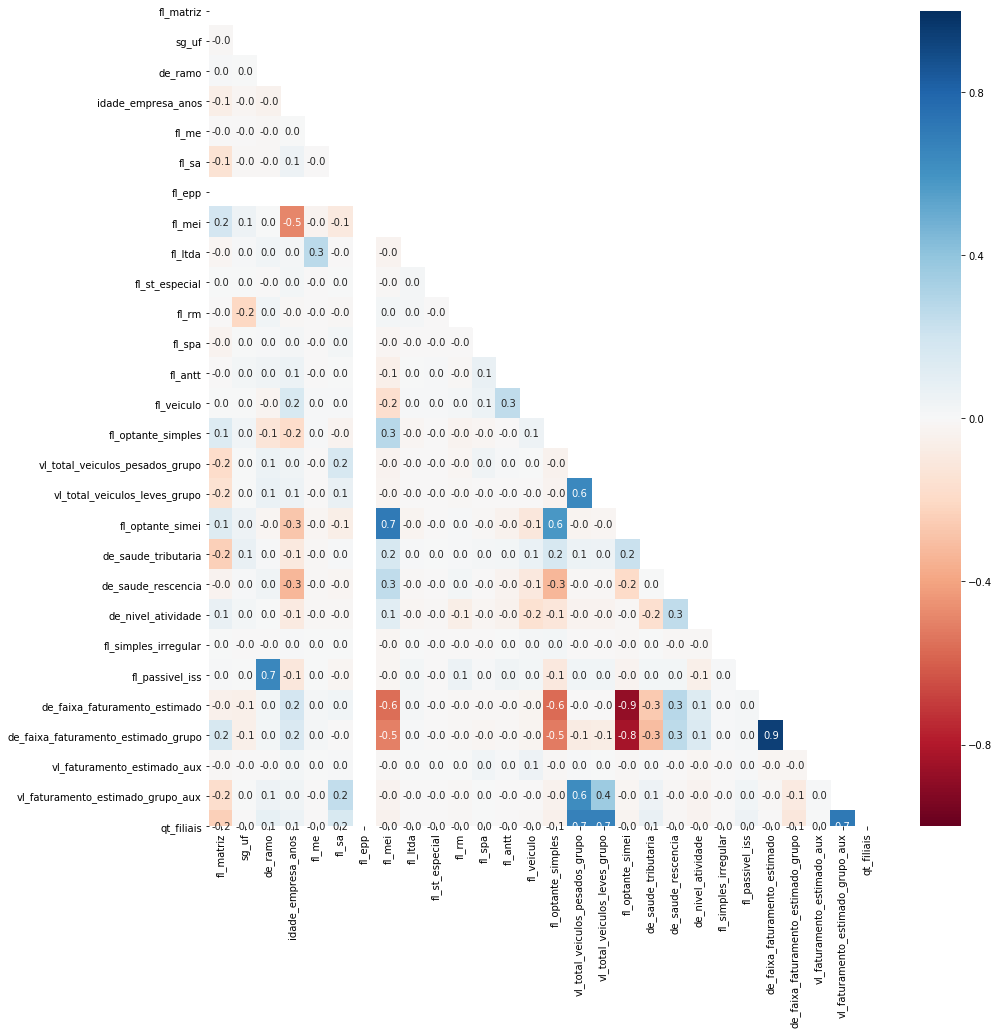

In [350]:
plot_heatmap(dfem)

### Retirando variáveis com correlações insignificantes

In [351]:
colunas_para_tirar2 = ['fl_epp', 'fl_st_especial', 'fl_spa', 'fl_simples_irregular', 'fl_ltda', 'vl_faturamento_estimado_aux']
dfem.drop(colunas_para_tirar2, axis = 1, inplace = True)

### Aplicação de método de agrupamentos (K-means)

#### Selecionando dados de treino

In [352]:
train = ['sg_uf', 'de_ramo', 'idade_empresa_anos', 'de_saude_tributaria', 'de_nivel_atividade', 'de_faixa_faturamento_estimado']
X = dfem[train]

#### Validação - Aplicação do método Elbow

In [353]:
wcss = []

for i in range (1, 7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

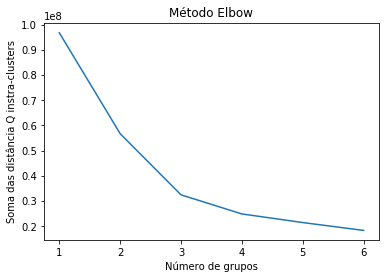

In [354]:
number_clusters = range(1, 7)
plt.plot(number_clusters, wcss)
plt.title('Método Elbow')
plt.xlabel('Número de grupos')
plt.ylabel('Soma das distância Q instra-clusters');

#### É possível verificar que a quantidade de grupos ideais é igual a 3, pois a partir desse valor, não se tem mais ganhos significantes de variância

In [355]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
kmeans.labels_
dfem['grupos'] = kmeans.labels_

In [363]:
vis = ['sg_uf', 'de_ramo','de_saude_tributaria', 'grupos']
VIS = dfem[vis]

<function matplotlib.pyplot.show(*args, **kw)>

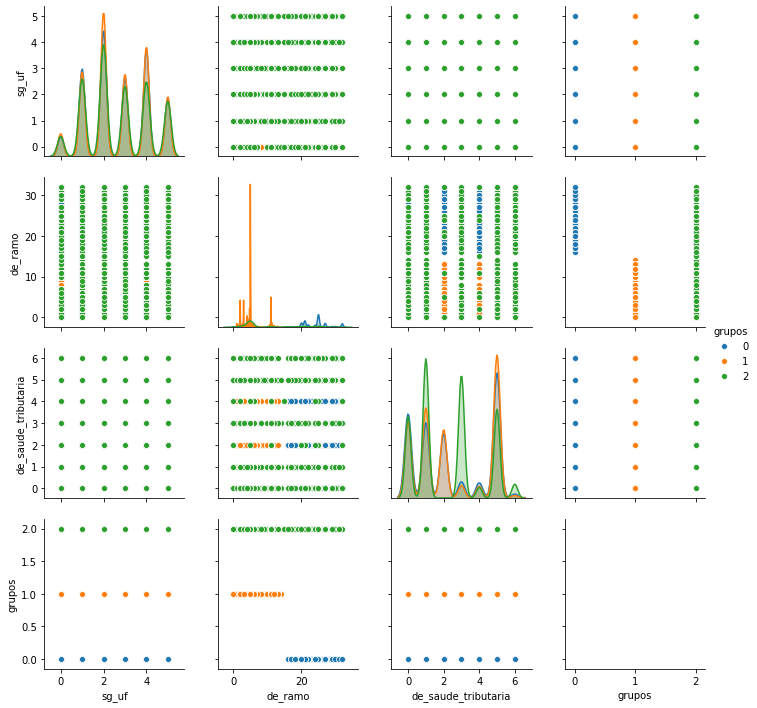

In [362]:
sns.pairplot(VIS, 'grupos')
plt.show